In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import RobustScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [107]:
modelling_df = pd.read_csv('Dataset/output_dataset.csv')

In [108]:
modelling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5725 entries, 0 to 5724
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   login                    5725 non-null   int64  
 1   country                  5725 non-null   object 
 2   account_currency         5725 non-null   object 
 3   Trading_Frequency        5725 non-null   float64
 4   Total_Trades             5725 non-null   int64  
 5   Buy_Percentage           5725 non-null   float64
 6   Average_Volume           5725 non-null   float64
 7   Average_Volume_USD       5725 non-null   float64
 8   Average_DPM              5725 non-null   float64
 9   Unique_Symbols_Traded    5725 non-null   int64  
 10  Peak_Trading_Times       5725 non-null   int64  
 11  Ratio_Profitable_Trades  5725 non-null   float64
 12  Profit_Loss_Variability  5725 non-null   float64
 13  Average_Trade_Duration   5725 non-null   float64
 14  TP/SL Hit Ratio         

In [109]:
modelling_df.describe()

,login,Trading_Frequency,Total_Trades,Buy_Percentage,Average_Volume,Average_Volume_USD,Average_DPM,Unique_Symbols_Traded,Peak_Trading_Times,Ratio_Profitable_Trades,...,Average_Trade_Duration,TP/SL Hit Ratio,Reward_Risk_Ratio,Average_Commission,Average_Swaps,Average_Profit,average_net_deposit,average_credit,longevity,longevity_bin
count,5.725000e+03,5725.000000,5725.000000,5725.000000,5725.000000,5.725000e+03,5725.000000,5725.000000,5725.000000,5725.000000,...,5.725000e+03,5725.000000,5725.000000,5725.000000,5725.000000,5725.000000,5725.000000,5725.000000,5725.000000,5725.000000
mean,4.260059e+06,24.677048,242.507424,44.600729,0.386369,2.283864e+08,-145.503040,5.700262,13.522445,0.472580,...,6.628252e+04,1.763087,1.714086,-0.410879,0.184834,-9.806129,15.091317,57.041656,45.232664,0.631790
std,1.654573e+07,710.948151,1023.377574,28.085715,1.621218,1.838682e+09,3692.263888,6.881594,4.689827,0.283212,...,2.094645e+05,27.804664,223.521743,3.629525,31.930857,720.966109,103.767705,242.761659,70.013825,1.011621
min,5.249780e+05,0.010178,1.000000,0.000000,0.005000,1.040000e+00,-109247.458671,1.000000,0.000000,0.000000,...,0.000000e+00,0.000000,-8311.305640,-108.598893,-1173.062580,-38585.491238,-2423.933085,0.000000,0.000000,0.000000
25%,8.148130e+05,1.000000,8.000000,26.402189,0.028333,2.613592e+04,-467.261699,1.000000,10.000000,0.285714,...,4.441059e+03,0.000000,0.000000,0.000000,-0.060256,-16.592206,0.303777,0.000000,2.000000,0.000000
50%,8.215830e+05,2.486111,33.000000,46.650718,0.078333,3.663738e+05,-71.891849,3.000000,15.000000,0.500000,...,1.570000e+04,0.000000,0.000000,0.000000,0.000000,-1.781250,2.597403,0.000000,15.000000,0.000000
75%,7.056823e+06,7.000000,142.000000,60.000000,0.270000,2.200197e+07,44.698309,7.000000,17.000000,0.666667,...,5.841114e+04,0.090909,0.199083,0.000000,0.000486,0.220833,8.539722,2.000000,60.000000,1.000000
max,1.000055e+09,46509.000000,46509.000000,100.000000,39.285714,6.827463e+10,112017.955519,65.000000,23.000000,1.000000,...,6.793694e+06,1245.000000,9557.708333,0.000000,1045.468282,15005.000000,3721.574881,8000.000000,415.000000,5.000000


In [110]:
# Convert 'country', 'account_currency', and 'Trading_Method' to categorical
modelling_df['country'] = modelling_df['country'].astype('category')
modelling_df['account_currency'] = modelling_df['account_currency'].astype('category')
modelling_df['Trading_Method'] = modelling_df['Trading_Method'].astype('category')

# Convert 'active' column to categorical
modelling_df['active'] = modelling_df['active'].astype('category')

## Correlation Analysis

In [111]:
numeric_cols = modelling_df.select_dtypes(include=['int64', 'float64']).columns

# Creating a new DataFrame with only numeric columns
df_numeric = modelling_df[numeric_cols]

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

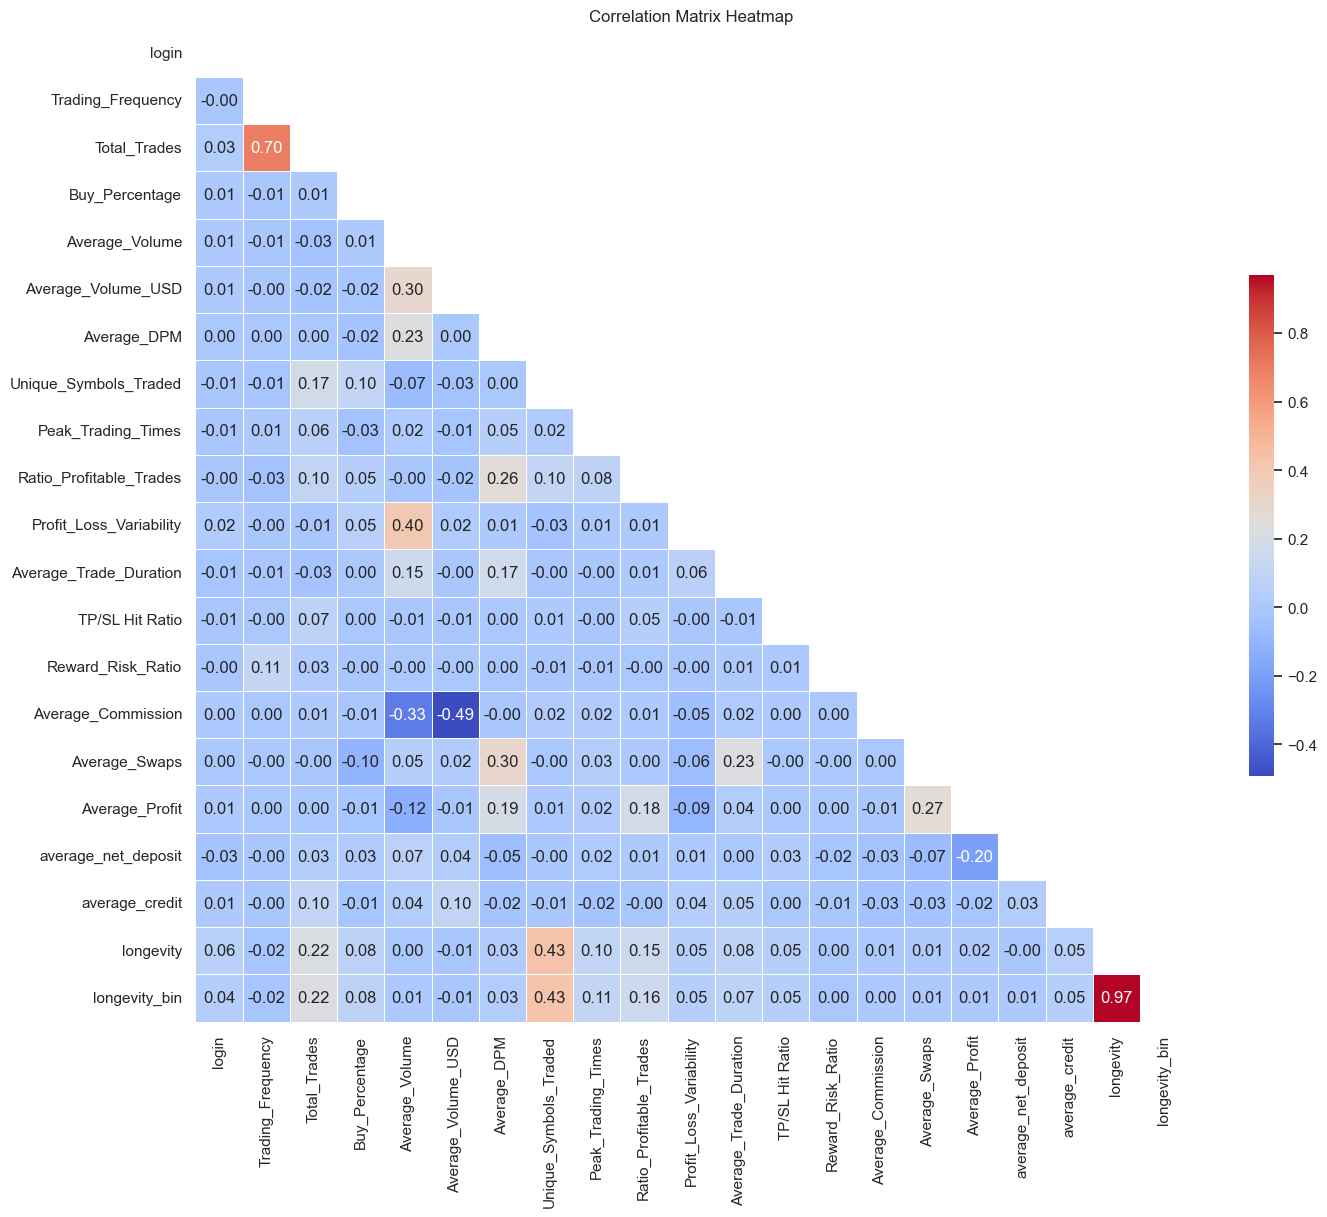

In [112]:
# Setting up the aesthetics for the heatmap
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(16, 13))

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', 
                      square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix Heatmap')
plt.show()

## Modelling Preprocessing

In [113]:
# Remove specified columns and set 'longevity' as the target variable
features_df = modelling_df.drop(columns=['login', 'active', 'Unique_Symbols_Traded', 'Average_Volume', 'longevity_bin'])
y = modelling_df['longevity']

In [114]:
# List of all numeric columns
all_numeric_cols = features_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# List of categorical columns
categorical_cols = ['country', 'account_currency', 'Trading_Method']  # Specified based on the dataset information provided earlier

# Columns to exclude from scaling
exclude_scaling = ['Buy_Percentage', 'TP/SL Hit Ratio', 'Reward_Risk_Ratio', 'Ratio_Profitable_Trades']

# Numeric columns to be scaled
numeric_cols_to_scale = [col for col in all_numeric_cols if col not in exclude_scaling]

# Create transformers for numeric and categorical data
numeric_transformer = RobustScaler()
categorical_transformer = OrdinalEncoder()

# Create a column transformer to apply the appropriate transformations to each column
preprocessor = ColumnTransformer(
    transformers=[
        ('num_to_scale', numeric_transformer, numeric_cols_to_scale),
        ('num_no_scale', 'passthrough', exclude_scaling),  # Pass through without scaling
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply transformations to the features
X_preprocessed = preprocessor.fit_transform(features_df)

# Get numeric feature names directly for scaled and non-scaled
numeric_feature_names = numeric_cols_to_scale + exclude_scaling

# Combine all feature names
all_feature_names_corrected = numeric_feature_names + categorical_cols

# Creating the complete feature DataFrame with the correct feature names
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=all_feature_names_corrected)

## Model Splitting

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed_df, y, test_size=0.2, random_state=42)

## Model Comparison

In [116]:
# Define regression models
regression_models = {
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBoost Regressor": XGBRegressor(objective='reg:squarederror'),  
    "Neural Network Regressor": MLPRegressor(max_iter=10000)
}

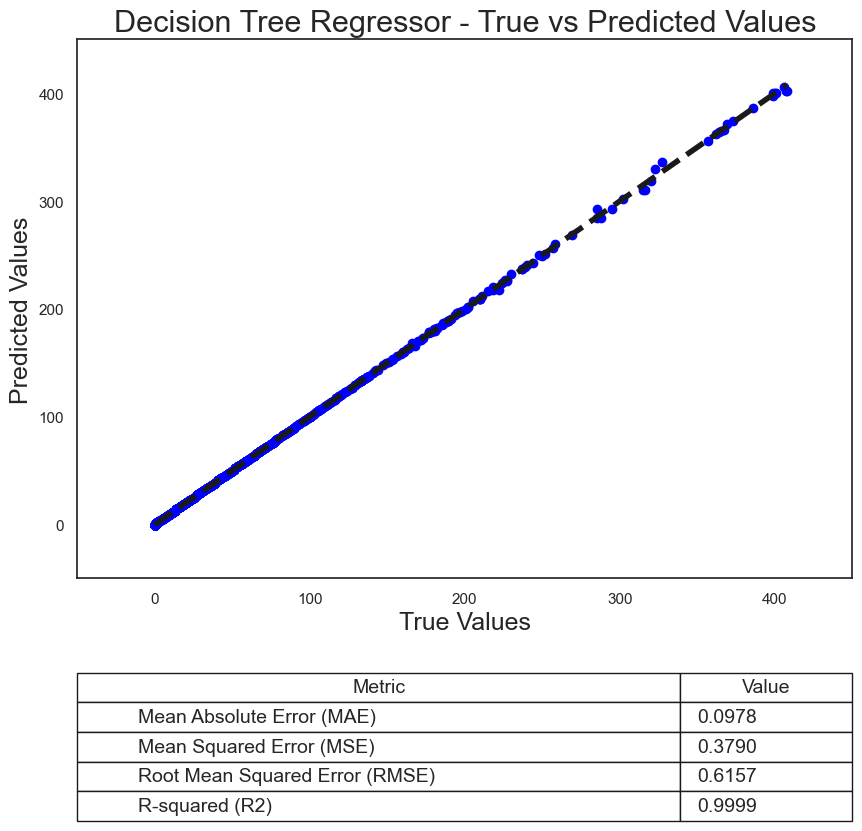

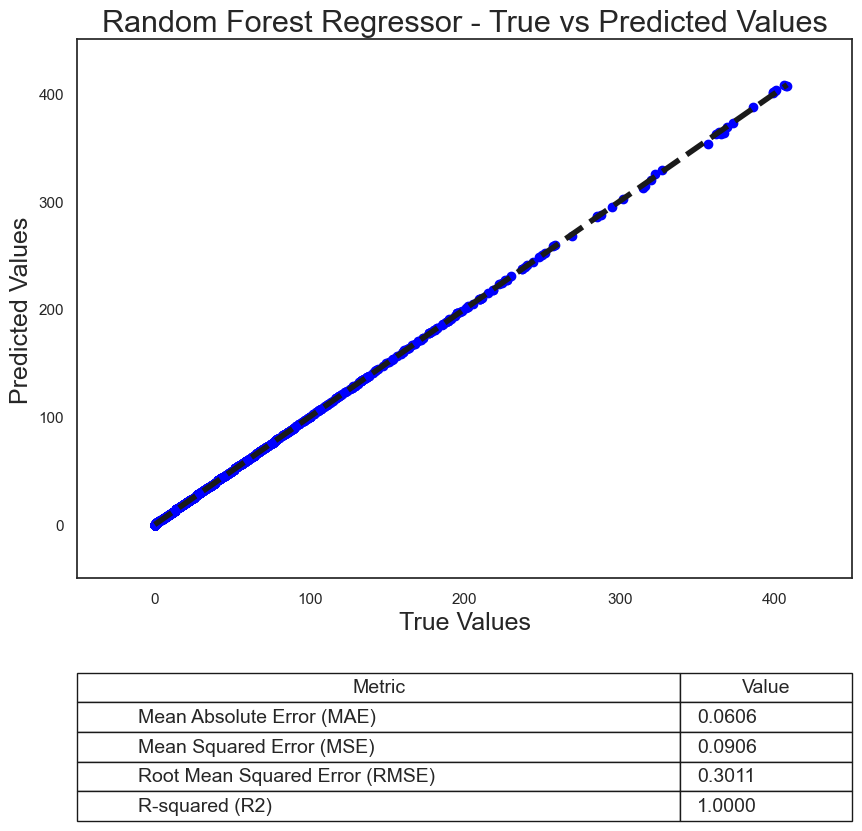

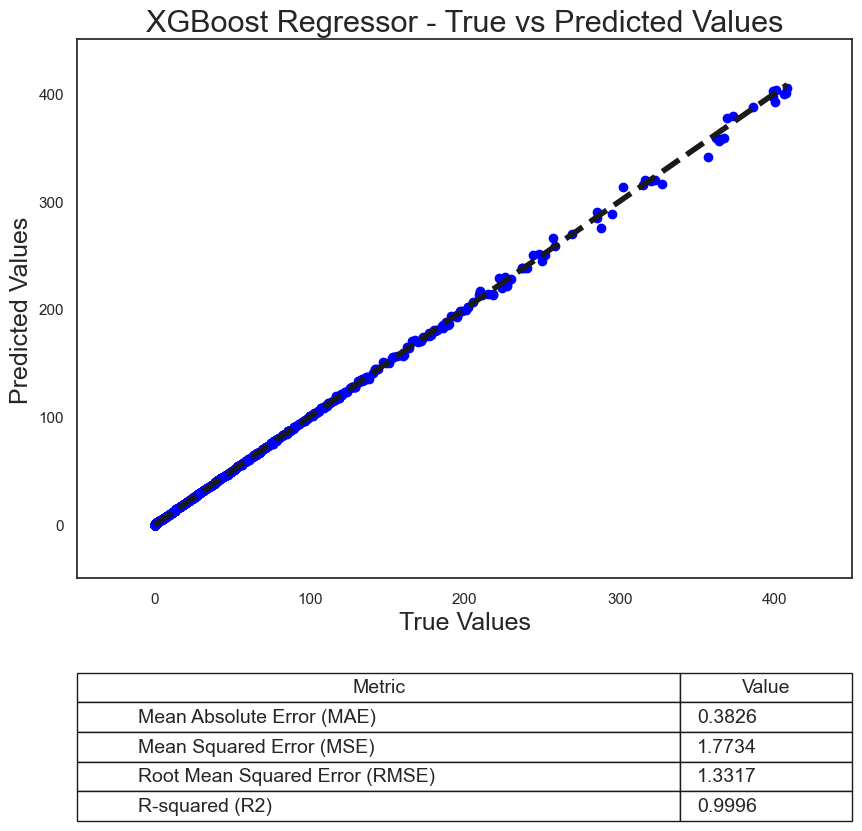

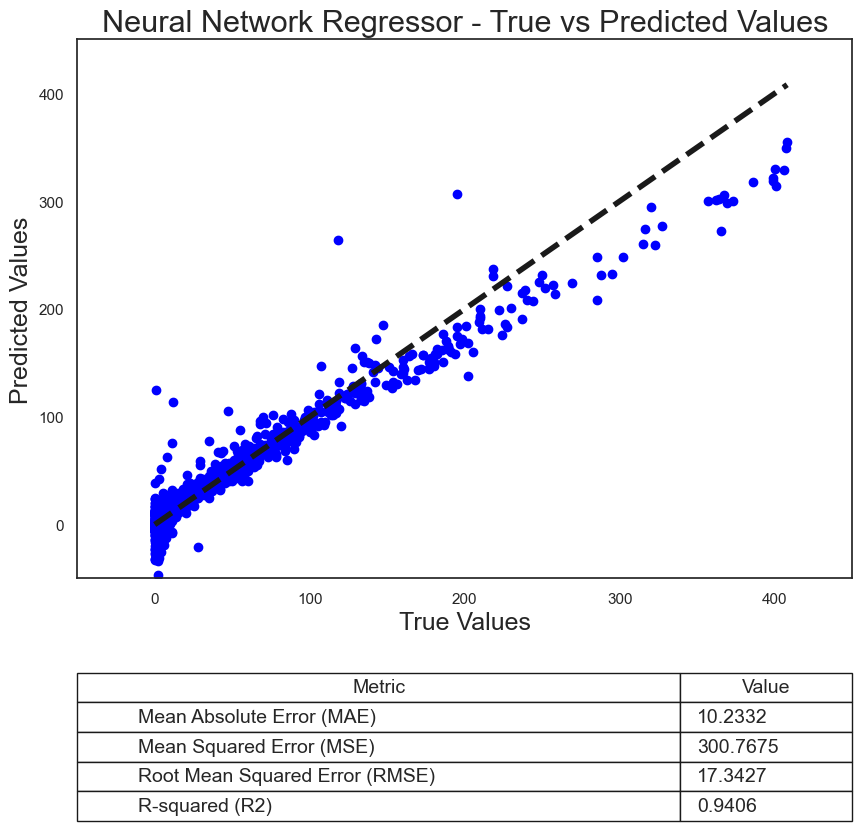

In [117]:
# Train and evaluate regression models
for name, model in regression_models.items():

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)  # Make predictions on the test set

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Plotting true vs predicted values
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(y_test, y_pred, color='blue')
    ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=4)
    ax.set_xlim([-50, 450])
    ax.set_ylim([-50, 450])
    ax.set_xlabel('True Values', fontsize=18)
    ax.set_ylabel('Predicted Values', fontsize=18)
    ax.set_title(f'{name} - True vs Predicted Values', fontsize=22)

    # Create a table with evaluation metrics
    table_data = [
        ["Mean Absolute Error (MAE)", f"{mae:.4f}"],
        ["Mean Squared Error (MSE)", f"{mse:.4f}"],
        ["Root Mean Squared Error (RMSE)", f"{rmse:.4f}"],
        ["R-squared (R2)", f"{r2:.4f}"]
    ]
    table = ax.table(cellText=table_data, loc='bottom', colLabels=["Metric", "Value"], cellLoc='left', colWidths=[0.35, 0.1], bbox=[0, -0.45, 1, 0.275])
    table.auto_set_font_size(False)
    table.set_fontsize(14)
    table.scale(2, 1.5)

    plt.show()
